In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/dataset.csv/depression_data.csv')
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


Comprobamos si hay valores nulos

In [3]:
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


FEATURE ENGINEERING

Creamos una nueva variable que sea riesgo de salud mental, combinando el historial de salud mental, antecedentes familiares de depresión e historial de abuso de sustancias.

In [4]:
df['History of Mental Illness'].unique()
df['History of Mental Illness'] = df['History of Mental Illness'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\159250016.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['History of Mental Illness'] = df['History of Mental Illness'].replace({'Yes': 1, 'No': 0})


In [5]:
df['Family History of Depression'] = df['Family History of Depression'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\1273082736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family History of Depression'] = df['Family History of Depression'].replace({'Yes': 1, 'No': 0})


In [6]:
df['History of Substance Abuse'] = df['History of Substance Abuse'].replace({'Yes': 1, 'No': 0})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\3747380085.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['History of Substance Abuse'] = df['History of Substance Abuse'].replace({'Yes': 1, 'No': 0})


Clasificamos las edades en grupos y hacemos un dummies

Creamos una nueva variable, dando puntuacion a su salud actual según sus hábitos.

In [7]:
df['Physical Activity Level'].unique()

array(['Active', 'Sedentary', 'Moderate'], dtype=object)

In [8]:
df['Physical Activity Level'] = df['Physical Activity Level'].replace({'Active': 2, 'Sedentary' : 0, 'Moderate': 1})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\3250541207.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Physical Activity Level'] = df['Physical Activity Level'].replace({'Active': 2, 'Sedentary' : 0, 'Moderate': 1})


In [9]:
df['Smoking Status'].unique()

array(['Non-smoker', 'Former', 'Current'], dtype=object)

In [10]:
df['Smoking Status'] = df['Smoking Status'].replace({'Non-smoker': 2, 'Current' : 0, 'Former': 1})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\2684347325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking Status'] = df['Smoking Status'].replace({'Non-smoker': 2, 'Current' : 0, 'Former': 1})


In [11]:
df['Alcohol Consumption'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

In [12]:
df['Alcohol Consumption'] = df['Alcohol Consumption'] .replace({'Low': 0, 'Moderate' : 1, 'High': 2})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\4100377010.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alcohol Consumption'] = df['Alcohol Consumption'] .replace({'Low': 0, 'Moderate' : 1, 'High': 2})


In [13]:
df['Dietary Habits'].unique()

array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object)

In [14]:
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate' : 1, 'Healthy': 2})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\4289256542.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 0, 'Moderate' : 1, 'Healthy': 2})


In [15]:
df['Sleep Patterns'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [16]:
df['Sleep Patterns'] = df['Sleep Patterns'].replace({'Poor': 0, 'Fair' : 1, 'Good': 2})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\1543916369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Patterns'] = df['Sleep Patterns'].replace({'Poor': 0, 'Fair' : 1, 'Good': 2})


Nos aseguramos que no hay ingresos negativos

In [17]:
if (df['Income'] <= 0).any():
    print("Hay valores cero o negativos en 'Income'. Se necesitan ajustes antes de la transformación.")

Logarizamos la variable para balancearla

In [18]:
df['Income'] = np.log(df['Income'])

In [19]:
df['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object)

In [20]:
df['Marital Status'] = df['Marital Status'].replace({'Widowed': 0, 'Divorced' : 1, 'Married': 2, 'Single' : 3})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\3913620344.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital Status'] = df['Marital Status'].replace({'Widowed': 0, 'Divorced' : 1, 'Married': 2, 'Single' : 3})


In [21]:
df['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

In [22]:
df['Education Level'] = df['Education Level'].replace({'High School': 0,'Associate Degree': 1,'Bachelor\'s Degree': 2,'Master\'s Degree': 3,'PhD': 4})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\3358805528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education Level'] = df['Education Level'].replace({'High School': 0,'Associate Degree': 1,'Bachelor\'s Degree': 2,'Master\'s Degree': 3,'PhD': 4})


In [23]:
df['Employment Status'].unique()

array(['Unemployed', 'Employed'], dtype=object)

In [24]:
df['Employment Status'] = df['Employment Status'].replace({'Unemployed': 0, 'Employed' : 1})

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\3407863754.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employment Status'] = df['Employment Status'].replace({'Unemployed': 0, 'Employed' : 1})


In [25]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,2,2,2,2,2,0,10.176018,1,1,1,1,0,1,Yes
1,Jacqueline Lewis,55,2,0,1,2,0,1,10.662197,2,0,1,1,0,0,Yes
2,Shannon Church,78,0,3,1,2,0,1,11.738728,0,0,2,0,0,1,No
3,Charles Jordan,58,1,3,3,2,1,0,9.209618,1,1,0,0,0,0,No
4,Michael Rich,18,3,0,0,2,0,0,9.058945,0,1,1,1,0,1,Yes


Veamos si está balanceada la variable objetivo

In [26]:
proporcion = df['Chronic Medical Conditions'].value_counts(normalize=True) * 100
print("Proporciones (%):")
print(proporcion)

Proporciones (%):
Chronic Medical Conditions
No     67.081311
Yes    32.918689
Name: proportion, dtype: float64


Eliminamos los nombres porque no aportan nada

In [27]:
df.drop(columns = 'Name', inplace = True)

In [28]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,2,2,2,2,2,0,10.176018,1,1,1,1,0,1,Yes
1,55,2,0,1,2,0,1,10.662197,2,0,1,1,0,0,Yes
2,78,0,3,1,2,0,1,11.738728,0,0,2,0,0,1,No
3,58,1,3,3,2,1,0,9.209618,1,1,0,0,0,0,No
4,18,3,0,0,2,0,0,9.058945,0,1,1,1,0,1,Yes


Movemos la variable target al final y, de paso, la llamamos así

In [29]:
df['Target'] = df['Chronic Medical Conditions'].replace({'Yes': True, 'No': False})
df.drop(columns='Chronic Medical Conditions', inplace = True)

C:\Users\Hugo Trabajo\AppData\Local\Temp\ipykernel_17440\2023349850.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Chronic Medical Conditions'].replace({'Yes': True, 'No': False})


In [30]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Target
0,31,2,2,2,2,2,0,10.176018,1,1,1,1,0,1,True
1,55,2,0,1,2,0,1,10.662197,2,0,1,1,0,0,True
2,78,0,3,1,2,0,1,11.738728,0,0,2,0,0,1,False
3,58,1,3,3,2,1,0,9.209618,1,1,0,0,0,0,False
4,18,3,0,0,2,0,0,9.058945,0,1,1,1,0,1,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  int64  
 2   Education Level               413768 non-null  int64  
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  int64  
 5   Physical Activity Level       413768 non-null  int64  
 6   Employment Status             413768 non-null  int64  
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  int64  
 9   Dietary Habits                413768 non-null  int64  
 10  Sleep Patterns                413768 non-null  int64  
 11  History of Mental Illness     413768 non-null  int64  
 12  History of Substance Abuse    413768 non-nul

In [32]:
df.to_csv('../data/processed/df_procesado.csv')

<Axes: >

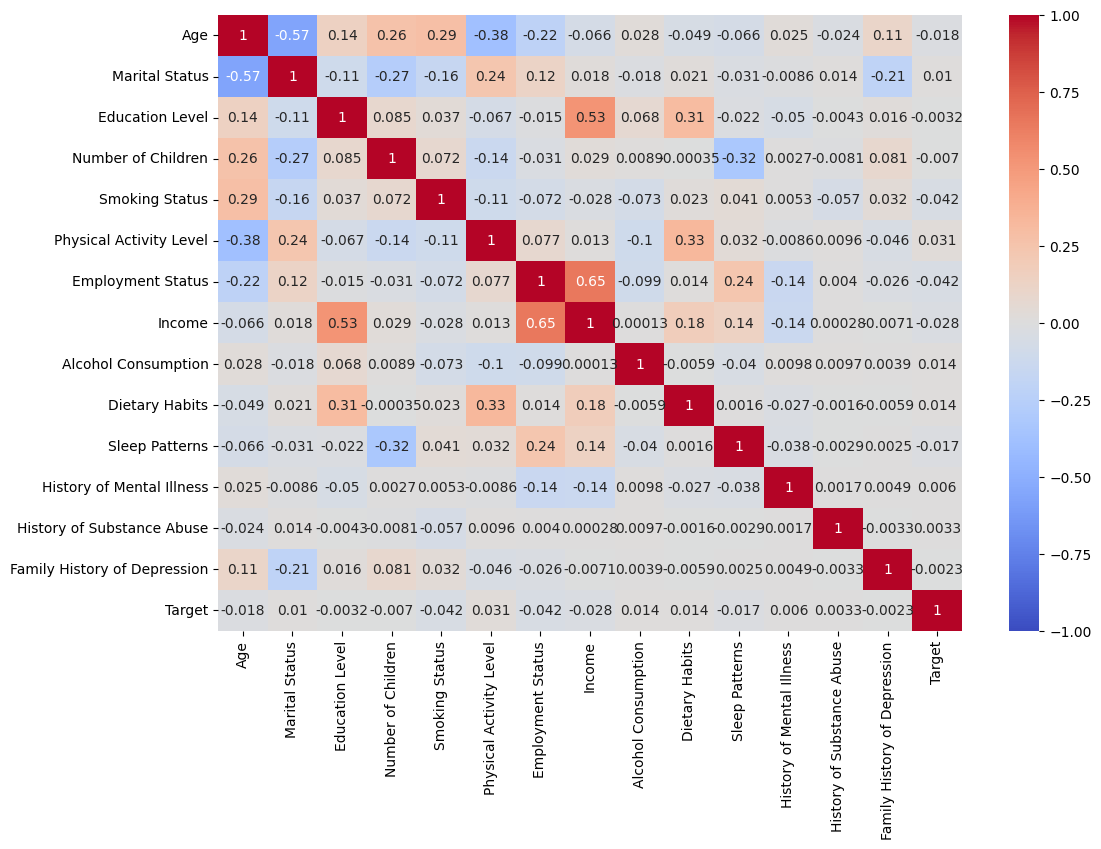

In [241]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

DIVISIÓN TRAIN TEST

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
from sklearn.model_selection import train_test_split

x = df.drop('Target', axis = 1)
y = df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x_train: {x_train.shape}, X_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (331014, 14), X_test: (82754, 14)
y_train: (331014,), y_test: (82754,)


In [36]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

NORMALIZACIÓN

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
scaler = StandardScaler()
# scaler.fit(x_train)
# scaler.transform(x_train,x_test)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(x_train)
x_train_scaled = minmax_scaler.transform(x_train)
x_test_scaled = minmax_scaler.transform(x_test)

Creación de modelo

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

# param_grid = {
#     'model__n_estimators': [50, 100],  
#     'model__max_depth': [2, 5, 10],  
#     'model__min_samples_split': [2, 5],  
#     'model__min_samples_leaf': [1, 2]  
# }


# random_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# random_search.fit(x_train_scaled, y_train)

# print("Mejores parámetros:", random_search.best_params_)
# print("Mejor score:", random_search.best_score_)


RandomForestClassifier()

In [46]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6305677066969573
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.87      0.76     55508
        True       0.34      0.14      0.19     27246

    accuracy                           0.63     82754
   macro avg       0.51      0.50      0.48     82754
weighted avg       0.56      0.63      0.57     82754

Confusion Matrix:
 [[48498  7010]
 [23562  3684]]


In [51]:
from sklearn.metrics import recall_score, classification_report

# Cálculo de la recall
recall = recall_score(y_test, y_pred, average='binary')  # 'binary' para problemas de clasificación binaria
print("Recall:", recall)

# Usando classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Recall: 0.13521250825809294
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.87      0.76     55508
        True       0.34      0.14      0.19     27246

    accuracy                           0.63     82754
   macro avg       0.51      0.50      0.48     82754
weighted avg       0.56      0.63      0.57     82754



In [58]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=150,        # Número de árboles
    max_depth=40,            # Profundidad máxima de cada árbol
    min_samples_split=4,    # Mínimo número de muestras para dividir un nodo
    min_samples_leaf=4,      # Mínimo número de muestras en una hoja
    class_weight='balanced', # Ajuste de peso para clases desbalanceadas
    random_state=42          # Semilla para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
random_forest_model.fit(x_train, y_train)

# Hacer predicciones
y_pred = random_forest_model.predict(x_test)

from sklearn.metrics import recall_score
print("Recall:", recall_score(y_test, y_pred))


Recall: 0.27703149086104384


In [ ]:
from sklearn.metrics import recall_score

probs = random_forest_model.predict_proba(x_test)[:, 1]
threshold = 0.2 
y_pred_custom_threshold = (probs >= threshold).astype(int)

print("Custom Threshold Recall:", recall_score(y_test, y_pred_custom_threshold))

Custom Threshold Recall: 0.9981281656022902
